In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, model_selection
from sklearn import neighbors
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder

abs_path = '/home/wolfi/development/liora-26feb-mlengineer/02-02-dagshub/examen-dvc'
df_minerals=pd.read_csv(abs_path+"/data/raw_data/raw.csv", sep=",")

# DataSet Minerals 

In [32]:
df_minerals.head()

,date,ave_flot_air_flow,ave_flot_level,iron_feed,starch_flow,amina_flow,ore_pulp_flow,ore_pulp_pH,ore_pulp_density,silica_concentrate
0,2017-04-24 00:00:00,300.263166,383.982443,55.17,1979.589150,599.676489,400.017222,9.774028,1.753206,4.360000
1,2017-04-24 01:00:00,299.782402,386.049069,55.17,1758.466329,600.043100,400.484528,9.539246,1.754190,3.290000
2,2017-04-24 02:00:00,299.750052,385.250935,55.17,2379.752428,599.948406,400.325617,9.434227,1.756873,4.900000
3,2017-04-24 03:00:00,299.997522,389.635519,55.17,2287.130046,599.580383,399.801506,9.725607,1.727125,4.860153
4,2017-04-24 04:00:00,300.005220,387.810807,55.17,2291.789167,599.871217,399.567333,9.845198,1.633063,4.780898


In [102]:
df_minerals.info()

<class 'pandas.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1817 non-null   str    
 1   ave_flot_air_flow   1817 non-null   float64
 2   ave_flot_level      1817 non-null   float64
 3   iron_feed           1817 non-null   float64
 4   starch_flow         1817 non-null   float64
 5   amina_flow          1817 non-null   float64
 6   ore_pulp_flow       1817 non-null   float64
 7   ore_pulp_pH         1817 non-null   float64
 8   ore_pulp_density    1817 non-null   float64
 9   silica_concentrate  1817 non-null   float64
dtypes: float64(9), str(1)
memory usage: 142.1 KB


In [103]:
df_minerals.isna().sum() / len(df_minerals) * 100

date                  0.0
ave_flot_air_flow     0.0
ave_flot_level        0.0
iron_feed             0.0
starch_flow           0.0
amina_flow            0.0
ore_pulp_flow         0.0
ore_pulp_pH           0.0
ore_pulp_density      0.0
silica_concentrate    0.0
dtype: float64

In [97]:
df_minerals.describe()

,ave_flot_air_flow,ave_flot_level,iron_feed,starch_flow,amina_flow,ore_pulp_flow,ore_pulp_pH,ore_pulp_density,silica_concentrate
count,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000
mean,296.036027,457.718993,57.594662,3106.797900,502.075958,400.015391,9.895610,1.681849,2.161673
std,6.342455,66.963782,5.753694,831.195329,65.957732,0.865649,0.298358,0.049554,1.047229
min,282.466012,306.748910,43.370000,401.628723,301.264021,396.331445,8.809455,1.546127,0.850000
25%,291.643054,408.780472,52.670000,2554.580328,454.769861,399.508139,9.705173,1.653314,1.370000
50%,299.859804,421.505544,57.380000,3144.695311,509.368744,399.976989,9.914017,1.690384,1.820000
75%,299.961731,500.251061,64.030000,3648.292550,553.007194,400.482357,10.103874,1.716987,2.670000
max,301.338649,767.639752,65.780000,5556.094067,715.748025,403.177721,10.758195,1.797635,5.330000


,ave_flot_air_flow,ave_flot_level,iron_feed,starch_flow,amina_flow,ore_pulp_flow,ore_pulp_pH,ore_pulp_density,silica_concentrate
ave_flot_air_flow,1.000000,0.097285,-0.153567,-0.080769,0.158010,0.010791,0.050278,0.031703,-0.234528
ave_flot_level,0.097285,1.000000,0.209132,-0.060403,-0.348147,0.009448,0.079871,-0.173648,-0.228412
iron_feed,-0.153567,0.209132,1.000000,-0.022178,-0.254767,0.017732,-0.015747,-0.283548,-0.040238
starch_flow,-0.080769,-0.060403,-0.022178,1.000000,0.177845,0.096631,0.355153,0.208843,-0.042897
amina_flow,0.158010,-0.348147,-0.254767,0.177845,1.000000,0.003927,0.041634,0.610035,0.221256
ore_pulp_flow,0.010791,0.009448,0.017732,0.096631,0.003927,1.000000,-0.044442,-0.017665,-0.066118
ore_pulp_pH,0.050278,0.079871,-0.015747,0.355153,0.041634,-0.044442,1.000000,0.118388,-0.096402
ore_pulp_density,0.031703,-0.173648,-0.283548,0.208843,0.610035,-0.017665,0.118388,1.000000,0.070763
silica_concentrate,-0.234528,-0.228412,-0.040238,-0.042897,0.221256,-0.066118,-0.096402,0.070763,1.000000


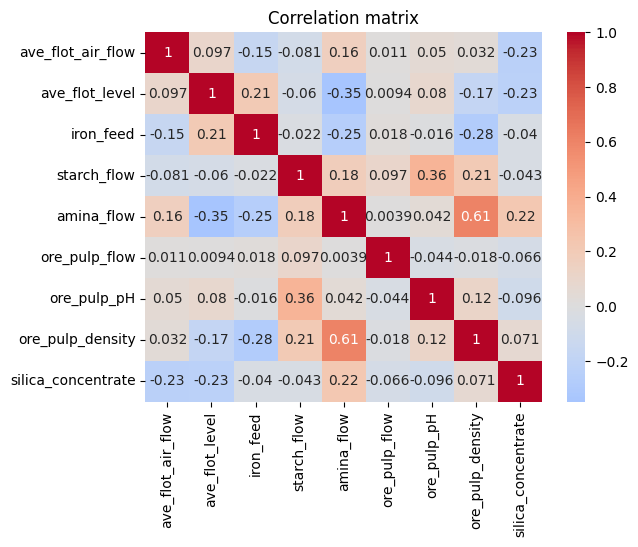

<class 'pandas.DataFrame'>
DatetimeIndex: 1817 entries, 2017-04-24 00:00:00 to 2017-09-08 15:00:00
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ave_flot_air_flow   1817 non-null   float64
 1   ave_flot_level      1817 non-null   float64
 2   iron_feed           1817 non-null   float64
 3   starch_flow         1817 non-null   float64
 4   amina_flow          1817 non-null   float64
 5   ore_pulp_flow       1817 non-null   float64
 6   ore_pulp_pH         1817 non-null   float64
 7   ore_pulp_density    1817 non-null   float64
 8   silica_concentrate  1817 non-null   float64
dtypes: float64(9)
memory usage: 142.0 KB


None

In [33]:
df_minerals['date'] = pd.to_datetime(df_minerals['date'])
df_minerals.set_index('date', inplace=True)

correlation_matrix = df_minerals.corr()
display(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation matrix')
plt.show()

#schlechteste correlation: ave_flot_air_flow, ave_flot_level ?
display(df_minerals.info())

In [34]:
# silizium neu berechnen aber 
# Teste, ob der Amina Flow von vor 30 Minuten besser korreliert
df_minerals['amina_lag30'] = df_minerals['amina_flow'].shift(30) # Falls 1 Zeile = 1 Minute
print(df_minerals[['amina_lag30', 'silica_concentrate']].corr())

                    amina_lag30  silica_concentrate
amina_lag30            1.000000            0.002642
silica_concentrate     0.002642            1.000000


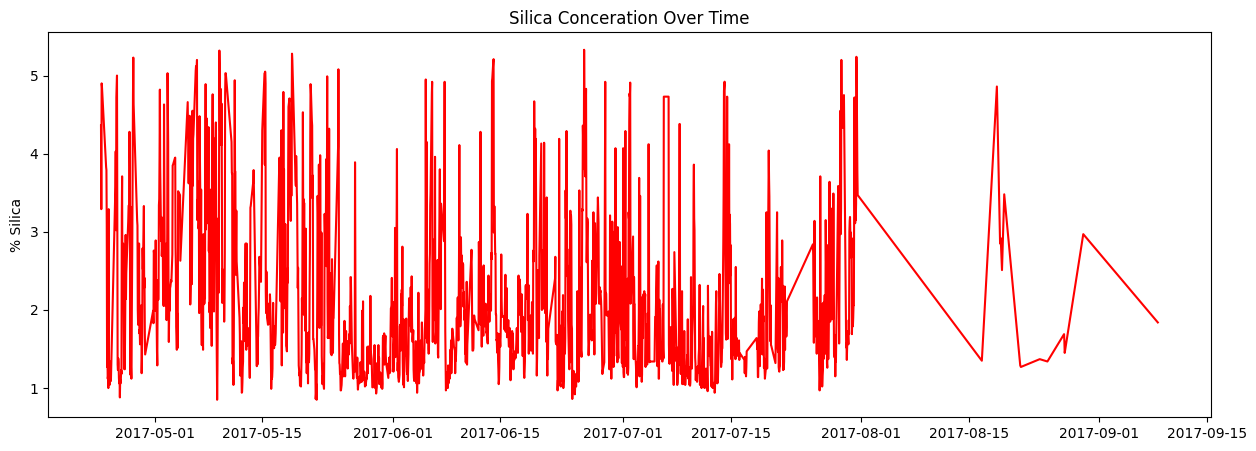

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Zeitreihenverlauf der Zielvariable
plt.figure(figsize=(15, 5))
plt.plot(df_minerals.index, df_minerals['silica_concentrate'], color='red')
plt.title('Silica Conceration Over Time')
plt.ylabel('% Silica')
plt.show()

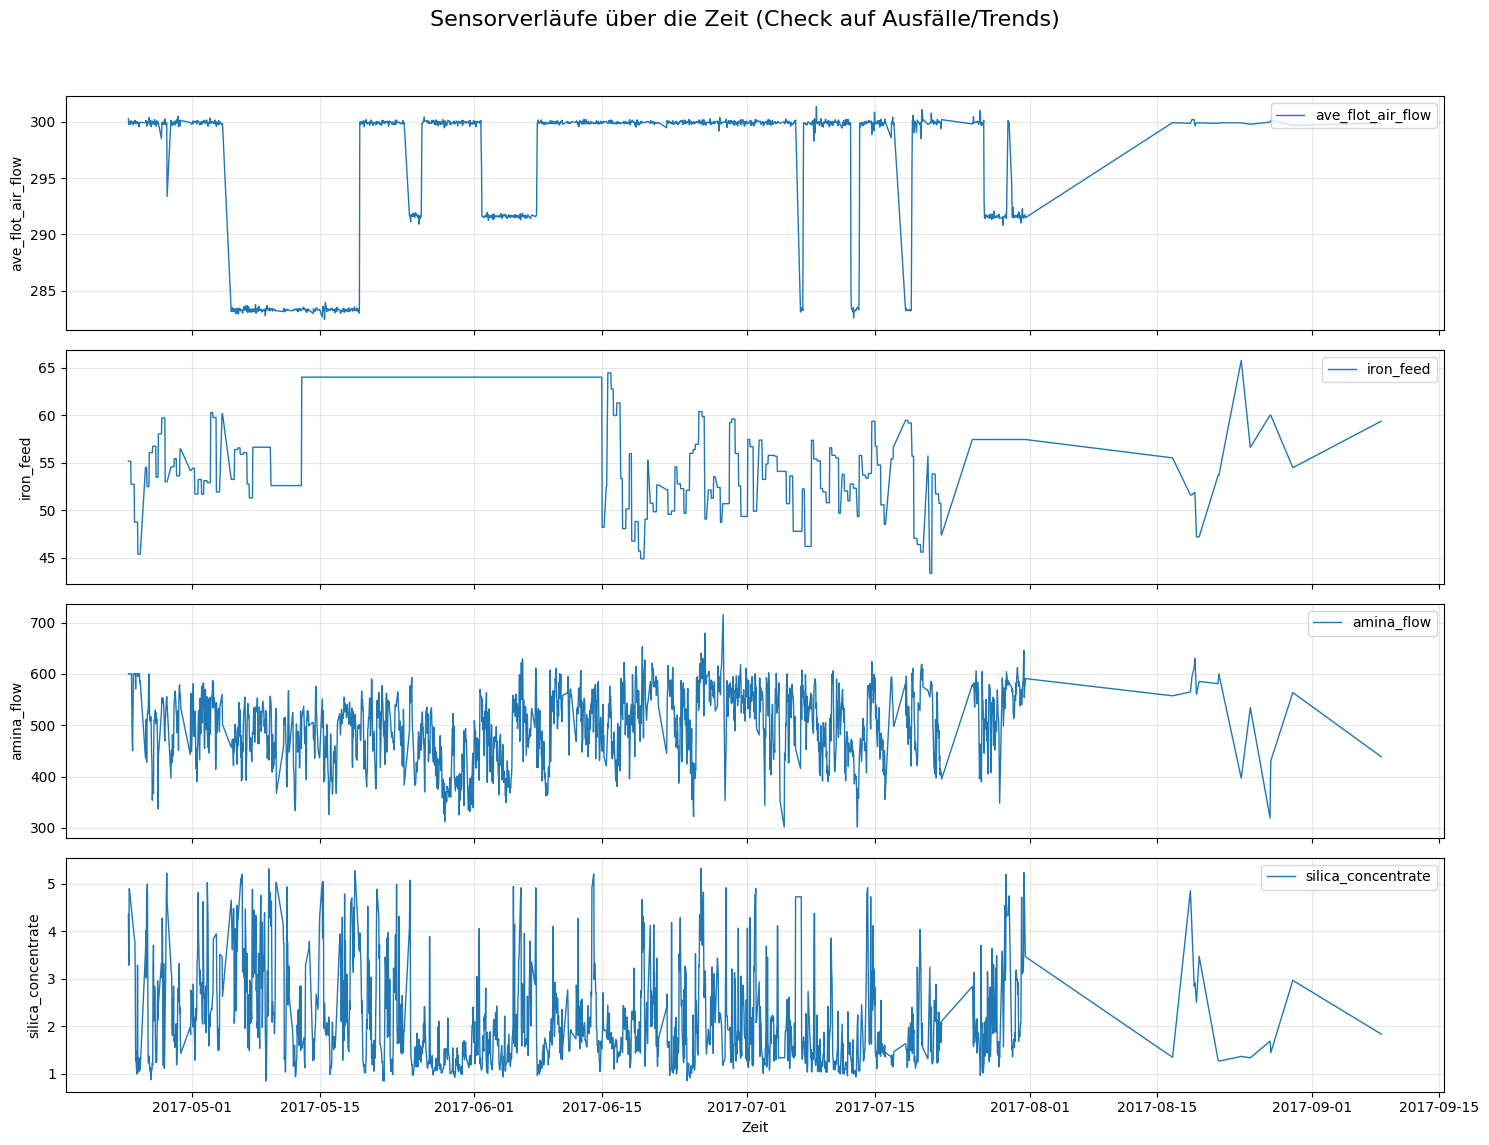

In [27]:
# Wähle die wichtigsten Features aus
features_to_plot = ['ave_flot_air_flow', 'iron_feed', 'amina_flow', 'silica_concentrate']

# Erstelle Subplots (einer unter dem anderen)
fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(15, 12), sharex=True)

for i, col in enumerate(features_to_plot):
    axes[i].plot(df_minerals.index, df_minerals[col], label=col, color='tab:blue', linewidth=1)
    axes[i].set_ylabel(col)
    axes[i].grid(True, alpha=0.3)
    axes[i].legend(loc='upper right')

plt.xlabel('Zeit')
plt.suptitle('Sensorverläufe über die Zeit (Check auf Ausfälle/Trends)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

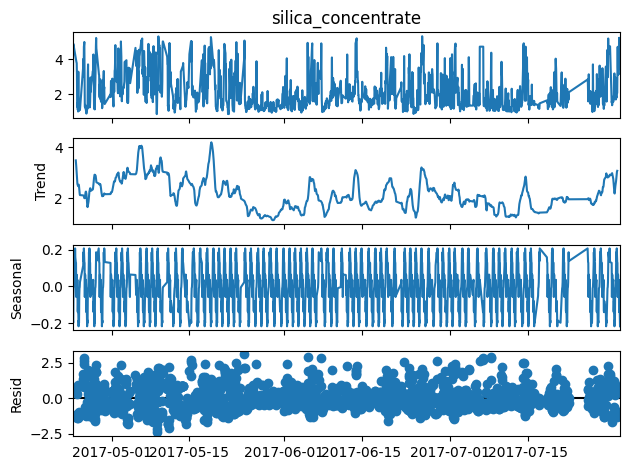

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_final = df_minerals[:'2017-07-31'].copy()

v = seasonal_decompose(df_final['silica_concentrate'], model='additive', period=24)
v.plot()
plt.show()

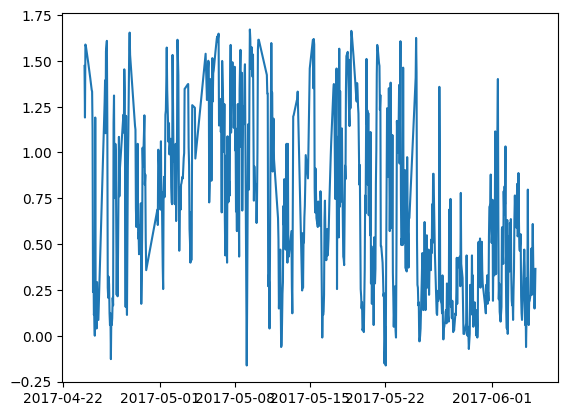

In [59]:
log = np.log(df_final['silica_concentrate'].head(800))
plt.plot(log)

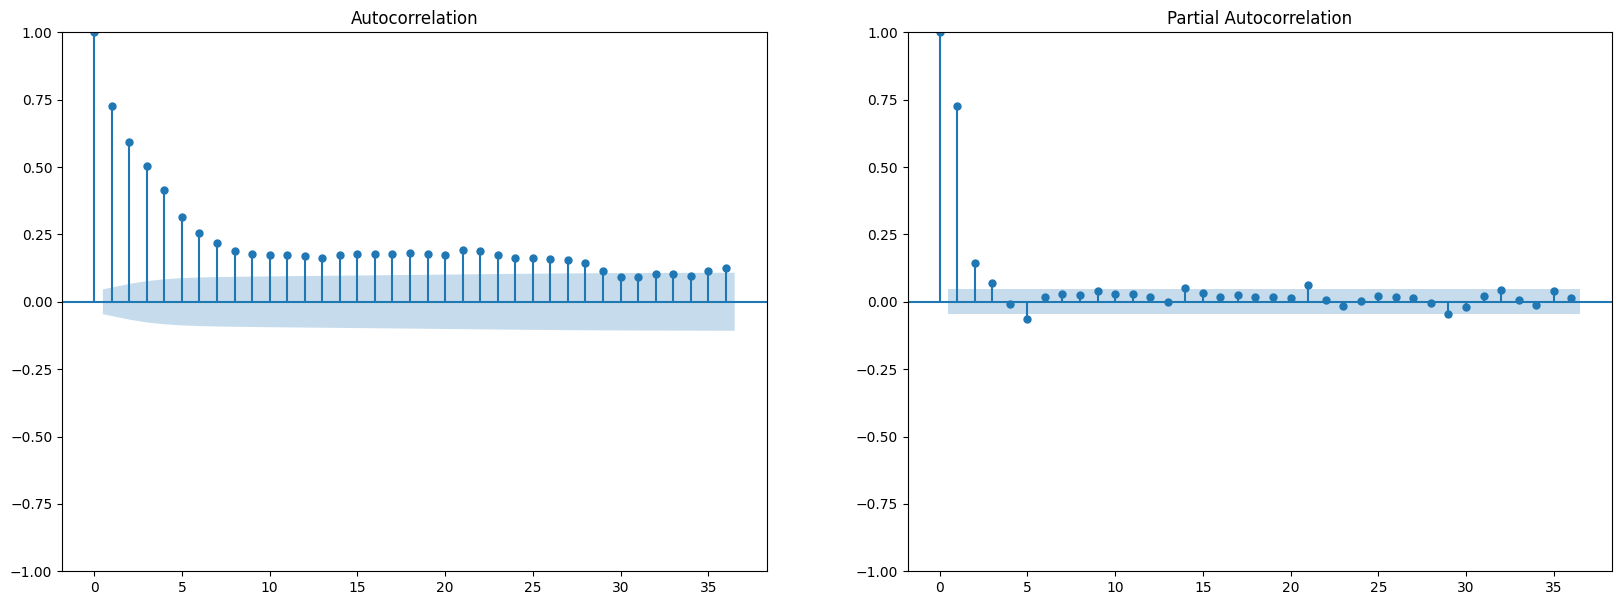

In [61]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))

plot_acf(df_final['silica_concentrate'], lags = 36, ax=ax1)
plot_pacf(df_final['silica_concentrate'], lags = 36, ax=ax2)
plt.show()

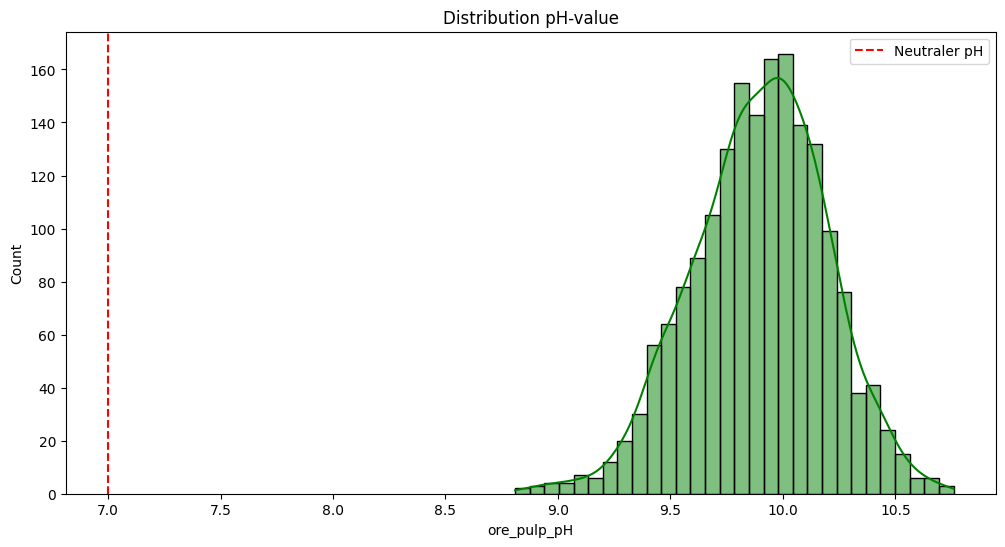

In [30]:
plt.figure(figsize=(12, 6))
# Beispiel für den pH-Wert
sns.histplot(df_minerals['ore_pulp_pH'], kde=True, color='green')
plt.title('Distribution pH-value')
plt.axvline(x=7, color='red', linestyle='--', label='Neutraler pH') # Referenzlinie
plt.legend()
plt.show()

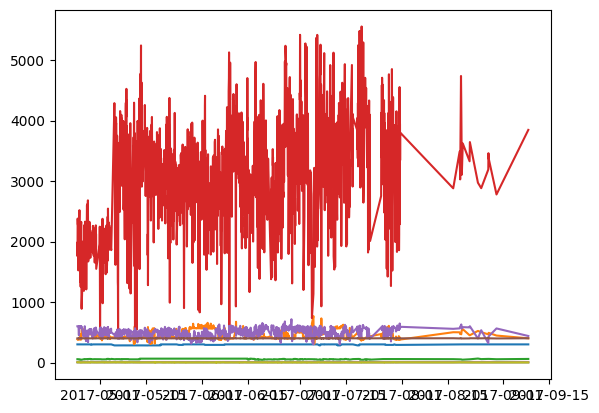

In [31]:
plt.plot(df_minerals)


In [28]:
from sklearn import ensemble
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score

abs_path = '/home/wolfi/development/liora-26feb-mlengineer/02-02-dagshub/examen-dvc'
df = pd.read_csv(abs_path+"/data/raw_data/raw.csv", sep=",")

# list_to_drop = ['ave_flot_air_flow', 'ave_flot_level']
# df.drop(list_to_drop, axis=1, inplace=True)


df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


#df = df[:'2017-07-31'].copy()

target = df['silica_concentrate']
feats = df.drop(['silica_concentrate'], axis=1)

# for col in feats.columns:
#     df[f'{col}_lag1'] = df[col].shift(1)
# df.dropna(inplace=True)

split_index = int(len(df) * 0.8)
X_train, X_test = feats.iloc[:split_index], feats.iloc[split_index:]
y_train, y_test = target.iloc[:split_index], target.iloc[split_index:]

model = ensemble.GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

model.fit(X_train, y_train)


predictions = model.predict(X_test)

# Fehler messen
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Durchschnittlicher Fehler (MAE): {mae:.3f} % Silica")
print(f"Bestimmtheitsmaß (R²): {r2:.3f}")

Durchschnittlicher Fehler (MAE): 0.834 % Silica
Bestimmtheitsmaß (R²): -0.342


9


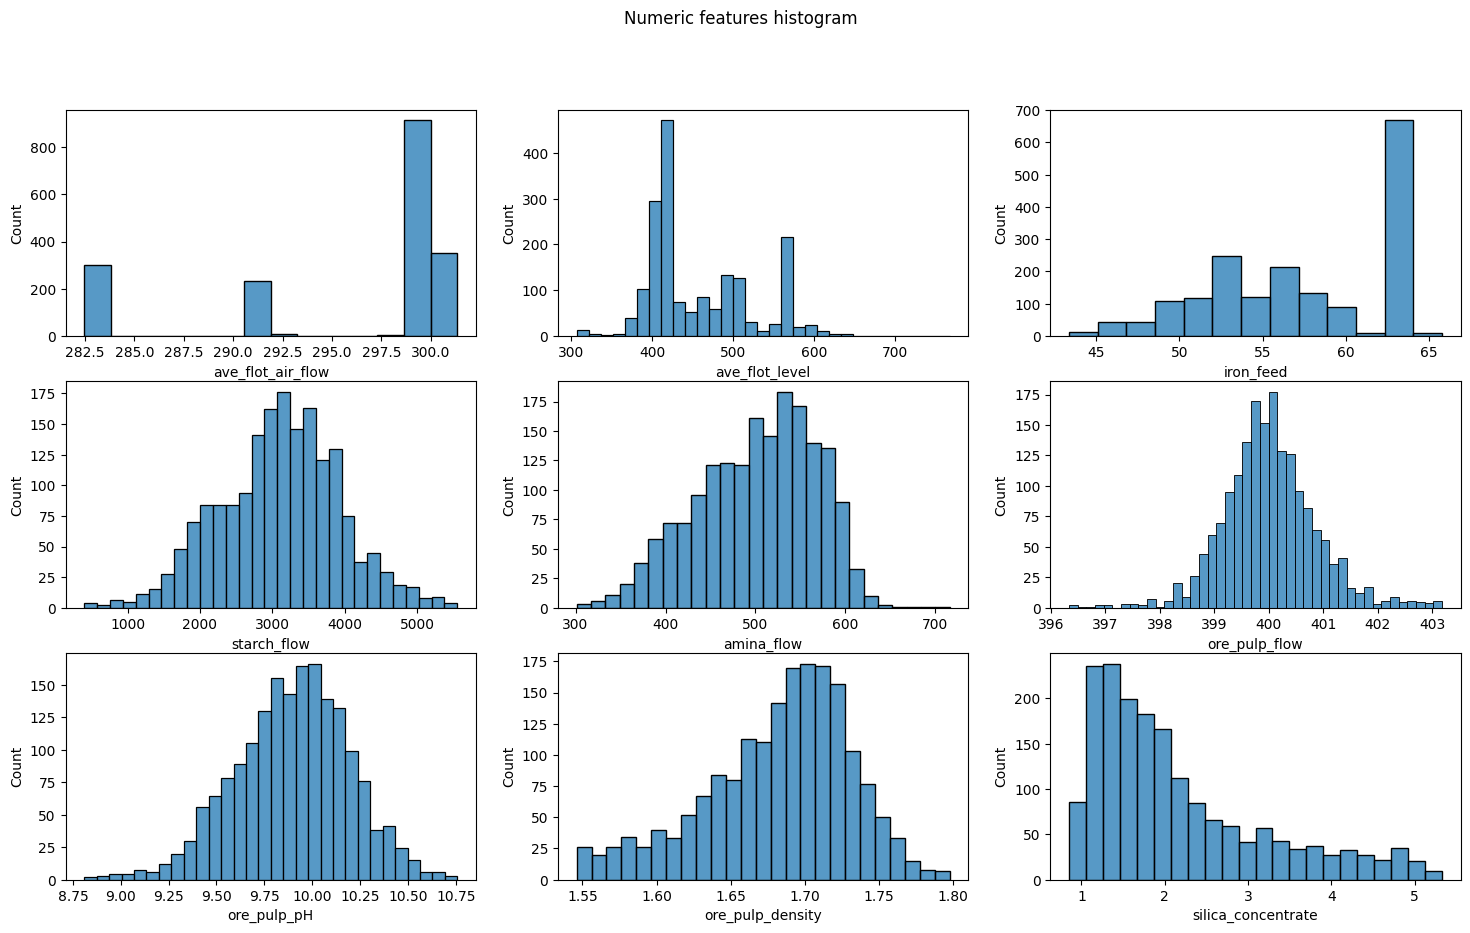

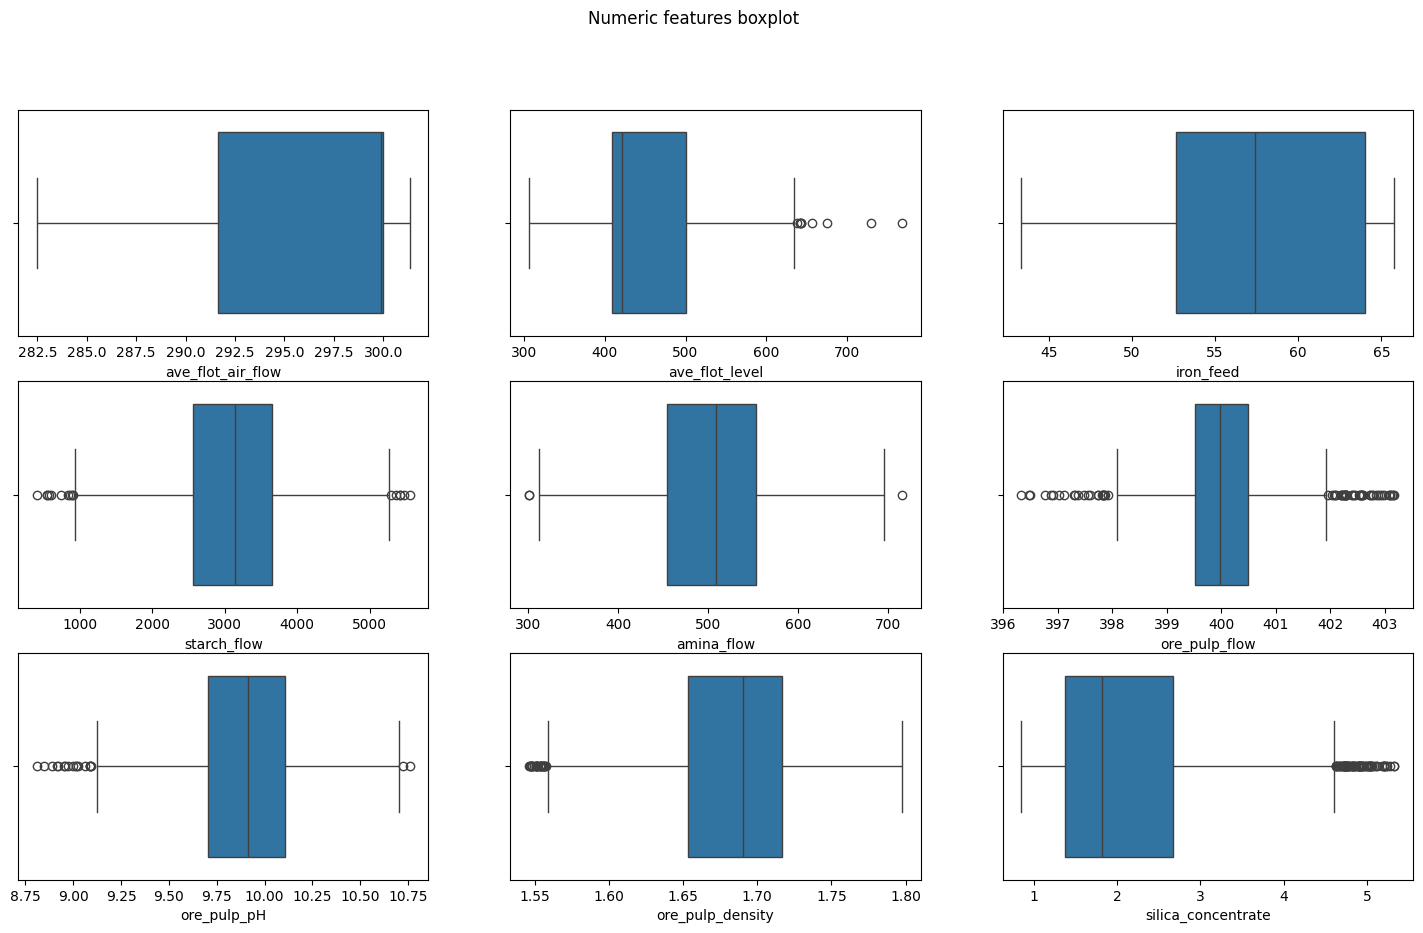

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create lists of features and target names
features = [col for col in df.columns
            if df[col].dtype=='float64' or col =='Type']

num_features = [feature for feature in features if df[feature].dtype=='float64']
print(len(num_features))

# Histograms of numeric features
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18,10))
fig.suptitle('Numeric features histogram')
for j, feature in enumerate(num_features):
    sns.histplot(ax=axs[j//3, j-3*(j//3)], data=df, x=feature)
plt.show()

# boxplot of numeric features
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18,10))
fig.suptitle('Numeric features boxplot')
for j, feature in enumerate(num_features):
    sns.boxplot(ax=axs[j//3, j-3*(j//3)], data=df, x=feature)
plt.show()
